# Multiple Linear Regression
## BIKE SHARING
This assignment is a programming assignment to build a multiple linear regression model for the prediction of demand for shared bikes
- Need to model the demand for shared bikes with the available independent variables 
- It will be used by the management to understand how exactly the demands vary with different features 
- The model will be a good way for management to understand the demand dynamics of a new market 

### Step 1: Reading and Understanding the Data

#### Import all the needed libraries

In [3]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

# to print versions of packages
#!pip install print-versions # works for python >= 3.8
from print_versions import print_versions

# versions
import sys
import platform

In [4]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

In [5]:
print(platform.python_version())
print_versions(globals())
import sklearn
print(sklearn.__version__)
import statsmodels 
print(statsmodels.__version__)

3.12.4
json==2.0.9
pandas==2.2.2
platform==1.0.8
numpy==1.26.4
seaborn==0.13.2
statsmodels.api==0.14.2
statsmodels==0.14.2
1.4.2
0.14.2


In [6]:
#Load the dataset
bikesrent = pd.read_csv("day.csv")

In [7]:
#checking the dataset loaded
bikesrent.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [8]:
bikesrent.shape

(730, 16)

In [9]:
bikesrent.info()  #Make sure no variables with null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [10]:
bikesrent.describe() #check the values of all variables

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### Step 2: Data Preparation 
#### Preprocessing

In [12]:
#Map value of categorical variable - Season by creating dummies
season = pd.get_dummies(bikesrent['season'], dtype=int, drop_first=True)

In [13]:
season.head()

,2,3,4
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


In [14]:
#Renaming columns of season
season.columns = ['summer', 'fall', 'winter']

In [15]:
season.head()

,summer,fall,winter
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


In [16]:
season.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   summer  730 non-null    int64
 1   fall    730 non-null    int64
 2   winter  730 non-null    int64
dtypes: int64(3)
memory usage: 17.2 KB


In [17]:
#concatenate "season" columns with original table
bikesrent = pd.concat([bikesrent, season], axis = 1)

In [18]:
bikesrent.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,summer,fall,winter
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985,0,0,0
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801,0,0,0
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,0,0,0
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,0,0,0
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,0,0,0


In [19]:
#dropping "season" cloumn as it is already categorized
bikesrent.drop(['season'], axis = 1, inplace = True)

In [20]:
bikesrent.shape

(730, 18)

In [21]:
bikesrent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   yr          730 non-null    int64  
 3   mnth        730 non-null    int64  
 4   holiday     730 non-null    int64  
 5   weekday     730 non-null    int64  
 6   workingday  730 non-null    int64  
 7   weathersit  730 non-null    int64  
 8   temp        730 non-null    float64
 9   atemp       730 non-null    float64
 10  hum         730 non-null    float64
 11  windspeed   730 non-null    float64
 12  casual      730 non-null    int64  
 13  registered  730 non-null    int64  
 14  cnt         730 non-null    int64  
 15  summer      730 non-null    int64  
 16  fall        730 non-null    int64  
 17  winter      730 non-null    int64  
dtypes: float64(4), int64(13), object(1)
memory usage: 102.8+ KB


In [22]:
#Map value of categorical variable - Weathersit by creating dummies
weather = pd.get_dummies(bikesrent['weathersit'], dtype=int, drop_first=True)

In [23]:
weather.head()

,2,3
0,1,0
1,1,0
2,0,0
3,0,0
4,0,0


In [24]:
weather.columns = ['mist', 'lightsnow']

In [25]:
weather.head()

,mist,lightsnow
0,1,0
1,1,0
2,0,0
3,0,0
4,0,0


In [26]:
#Concatenate "weathersit" columns with original table 
bikesrent = pd.concat([bikesrent, weather], axis = 1)

In [27]:
bikesrent.head()

,instant,dteday,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,summer,fall,winter,mist,lightsnow
0,1,01-01-2018,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985,0,0,0,1,0
1,2,02-01-2018,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801,0,0,0,1,0
2,3,03-01-2018,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,0,0,0,0,0
3,4,04-01-2018,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,0,0,0,0,0
4,5,05-01-2018,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,0,0,0,0,0


In [28]:
#dropping "weathersit" cloumn as it is already categorized
bikesrent.drop(['weathersit'], axis = 1, inplace = True)

In [29]:
bikesrent.head()

,instant,dteday,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,summer,fall,winter,mist,lightsnow
0,1,01-01-2018,0,1,0,6,0,14.110847,18.18125,80.5833,10.749882,331,654,985,0,0,0,1,0
1,2,02-01-2018,0,1,0,0,0,14.902598,17.68695,69.6087,16.652113,131,670,801,0,0,0,1,0
2,3,03-01-2018,0,1,0,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,0,0,0,0,0
3,4,04-01-2018,0,1,0,2,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,0,0,0,0,0
4,5,05-01-2018,0,1,0,3,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,0,0,0,0,0


In [30]:
#Map value of categorical variable - "mnth" by creating dummies
month = pd.get_dummies(bikesrent['mnth'], dtype=int, drop_first=True)

In [31]:
month.head()

,2,3,4,5,6,7,8,9,10,11,12
0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0


In [32]:
month.columns = ['Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

In [33]:
month.head()

,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0


In [34]:
#Concatenate "month" columns with original table 
bikesrent = pd.concat([bikesrent, month], axis = 1)

In [35]:
bikesrent.head()

,instant,dteday,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,...,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1,01-01-2018,0,1,0,6,0,14.110847,18.18125,80.5833,...,0,0,0,0,0,0,0,0,0,0
1,2,02-01-2018,0,1,0,0,0,14.902598,17.68695,69.6087,...,0,0,0,0,0,0,0,0,0,0
2,3,03-01-2018,0,1,0,1,1,8.050924,9.47025,43.7273,...,0,0,0,0,0,0,0,0,0,0
3,4,04-01-2018,0,1,0,2,1,8.200000,10.60610,59.0435,...,0,0,0,0,0,0,0,0,0,0
4,5,05-01-2018,0,1,0,3,1,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,0,0,0


In [36]:
#dropping "month" cloumn as it is already categorized
bikesrent.drop(['mnth'], axis = 1, inplace = True)

In [37]:
bikesrent.head()

,instant,dteday,yr,holiday,weekday,workingday,temp,atemp,hum,windspeed,...,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1,01-01-2018,0,0,6,0,14.110847,18.18125,80.5833,10.749882,...,0,0,0,0,0,0,0,0,0,0
1,2,02-01-2018,0,0,0,0,14.902598,17.68695,69.6087,16.652113,...,0,0,0,0,0,0,0,0,0,0
2,3,03-01-2018,0,0,1,1,8.050924,9.47025,43.7273,16.636703,...,0,0,0,0,0,0,0,0,0,0
3,4,04-01-2018,0,0,2,1,8.200000,10.60610,59.0435,10.739832,...,0,0,0,0,0,0,0,0,0,0
4,5,05-01-2018,0,0,3,1,9.305237,11.46350,43.6957,12.522300,...,0,0,0,0,0,0,0,0,0,0


In [38]:
#Map value of categorical variable - "weekday" by creating dummies
wkday = pd.get_dummies(bikesrent['weekday'], dtype=int, drop_first=True)

In [39]:
wkday.head()

,1,2,3,4,5,6
0,0,0,0,0,0,1
1,0,0,0,0,0,0
2,1,0,0,0,0,0
3,0,1,0,0,0,0
4,0,0,1,0,0,0


In [40]:
wkday.columns = ['Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat']

In [41]:
wkday.head()

,Mon,Tue,Wed,Thur,Fri,Sat
0,0,0,0,0,0,1
1,0,0,0,0,0,0
2,1,0,0,0,0,0
3,0,1,0,0,0,0
4,0,0,1,0,0,0


In [42]:
#Concatenate "weekday" columns with original table 
bikesrent = pd.concat([bikesrent, wkday], axis = 1)

In [43]:
#dropping "wkday" cloumn as it is already categorized
bikesrent.drop(['weekday'], axis = 1, inplace = True)

In [44]:
bikesrent.head()

,instant,dteday,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,...,Sep,Oct,Nov,Dec,Mon,Tue,Wed,Thur,Fri,Sat
0,1,01-01-2018,0,0,0,14.110847,18.18125,80.5833,10.749882,331,...,0,0,0,0,0,0,0,0,0,1
1,2,02-01-2018,0,0,0,14.902598,17.68695,69.6087,16.652113,131,...,0,0,0,0,0,0,0,0,0,0
2,3,03-01-2018,0,0,1,8.050924,9.47025,43.7273,16.636703,120,...,0,0,0,0,1,0,0,0,0,0
3,4,04-01-2018,0,0,1,8.200000,10.60610,59.0435,10.739832,108,...,0,0,0,0,0,1,0,0,0,0
4,5,05-01-2018,0,0,1,9.305237,11.46350,43.6957,12.522300,82,...,0,0,0,0,0,0,1,0,0,0


In [45]:
#dropping "casual" & "registered" cloumn as this feature not interested/needed since "cnt" is the target variable
bikesrent.drop(['casual','registered'], axis = 1, inplace = True)

In [46]:
bikesrent.head()

,instant,dteday,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,...,Sep,Oct,Nov,Dec,Mon,Tue,Wed,Thur,Fri,Sat
0,1,01-01-2018,0,0,0,14.110847,18.18125,80.5833,10.749882,985,...,0,0,0,0,0,0,0,0,0,1
1,2,02-01-2018,0,0,0,14.902598,17.68695,69.6087,16.652113,801,...,0,0,0,0,0,0,0,0,0,0
2,3,03-01-2018,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,...,0,0,0,0,1,0,0,0,0,0
3,4,04-01-2018,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,...,0,0,0,0,0,1,0,0,0,0
4,5,05-01-2018,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,...,0,0,0,0,0,0,1,0,0,0


In [47]:
#dropping "holiday" as already another variable "workingday" gives the same information
bikesrent.drop(['holiday'], axis = 1, inplace = True)

In [48]:
#dropping "dteday" as already other variables like "yr", "mnth" gives the same information
bikesrent.drop(['dteday'], axis = 1, inplace = True)

In [49]:
#dropping "instant" as it just represents the serial number
bikesrent.drop(['instant'], axis = 1, inplace = True)

In [50]:
bikesrent.head()

,yr,workingday,temp,atemp,hum,windspeed,cnt,summer,fall,winter,...,Sep,Oct,Nov,Dec,Mon,Tue,Wed,Thur,Fri,Sat
0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [51]:
bikesrent.shape

(730, 29)

In [52]:
#checking none of the column has null values
bikesrent.isnull().sum()

yr            0
workingday    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
summer        0
fall          0
winter        0
mist          0
lightsnow     0
Feb           0
Mar           0
Apr           0
May           0
Jun           0
Jul           0
Aug           0
Sep           0
Oct           0
Nov           0
Dec           0
Mon           0
Tue           0
Wed           0
Thur          0
Fri           0
Sat           0
dtype: int64

### Step 3: EDA - Exploratory Data Analysis
#### Univariate and Bivariate analysis

<Axes: xlabel='yr'>

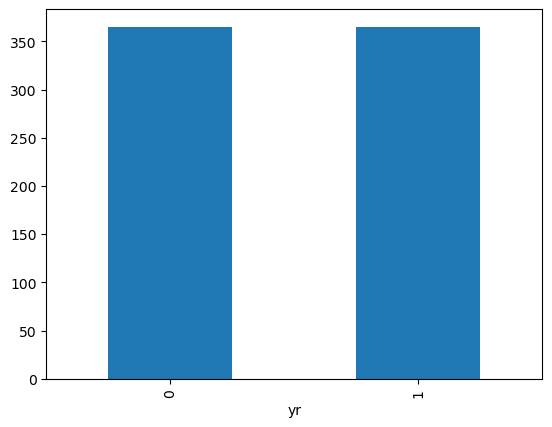

In [54]:
#Plotting against few variables like workingday, weekday..
bikesrent['yr'].value_counts().plot.bar()

<Axes: xlabel='workingday'>

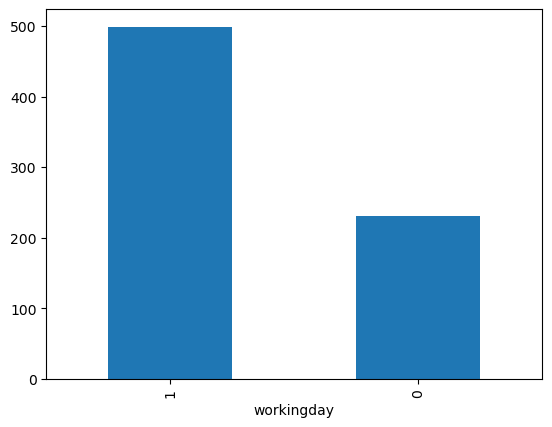

In [55]:
bikesrent['workingday'].value_counts().plot.bar()

<Axes: xlabel='summer'>

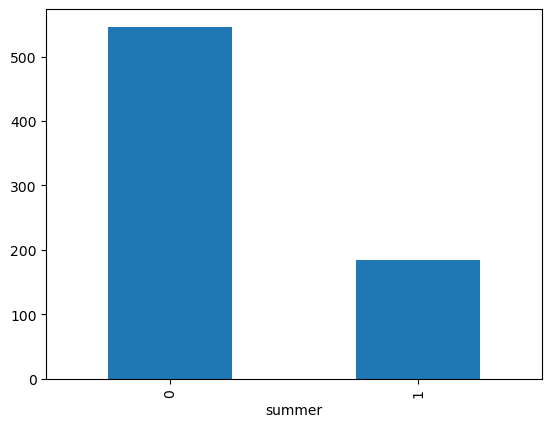

In [56]:
bikesrent['summer'].value_counts().plot.bar()

<Axes: xlabel='yr', ylabel='cnt'>

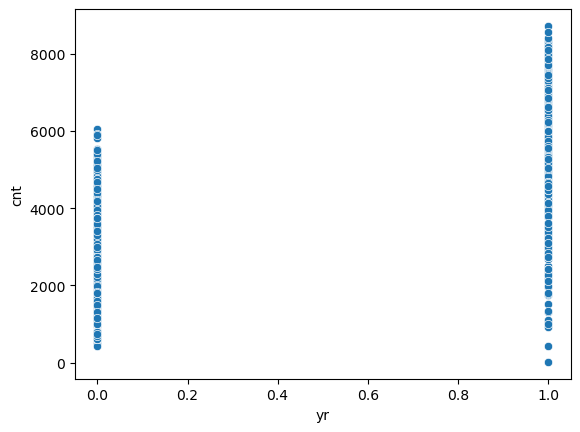

In [57]:
sns.scatterplot(x="yr", y="cnt", data=bikesrent)

### Step 4: Train - Test Split
#### Splitting into train and test dataset

In [59]:
# We specify this so that the train and test data set always have the same rows, respectively
#splitting train and test data with 70:30 ratio
np.random.seed(0)
df_train, df_test = train_test_split(bikesrent, train_size = 0.7, test_size = 0.3, random_state = 100)
print(df_train.shape)
print(df_test.shape)

(510, 29)
(219, 29)


### Step 5: Scaling Variables
#### Using Min-Max Scaler

In [61]:
#instantiate an object
scaler = MinMaxScaler()
#selecting variables which needs to be bring to common scale
num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']

#fit on data
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,yr,workingday,temp,atemp,hum,windspeed,cnt,summer,fall,winter,...,Sep,Oct,Nov,Dec,Mon,Tue,Wed,Thur,Fri,Sat
653,1,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,1,...,0,1,0,0,0,1,0,0,0,0
576,1,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,1,0,...,0,0,0,0,0,1,0,0,0,0
426,1,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,0,...,0,0,0,0,0,0,0,0,0,1
728,1,0,0.245101,0.200348,0.498067,0.663106,0.204096,0,0,0,...,0,0,0,1,0,0,0,0,0,0
482,1,0,0.395666,0.391735,0.504508,0.188475,0.482973,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [62]:
df_train[num_vars].describe()

,temp,atemp,hum,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.537262,0.512989,0.650369,0.320768,0.513620
std,0.225844,0.212385,0.145882,0.169797,0.224593
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.339853,0.332086,0.538643,0.199179,0.356420
50%,0.540519,0.526811,0.653714,0.296763,0.518638
75%,0.735215,0.688457,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [63]:
df_train.shape

(510, 29)

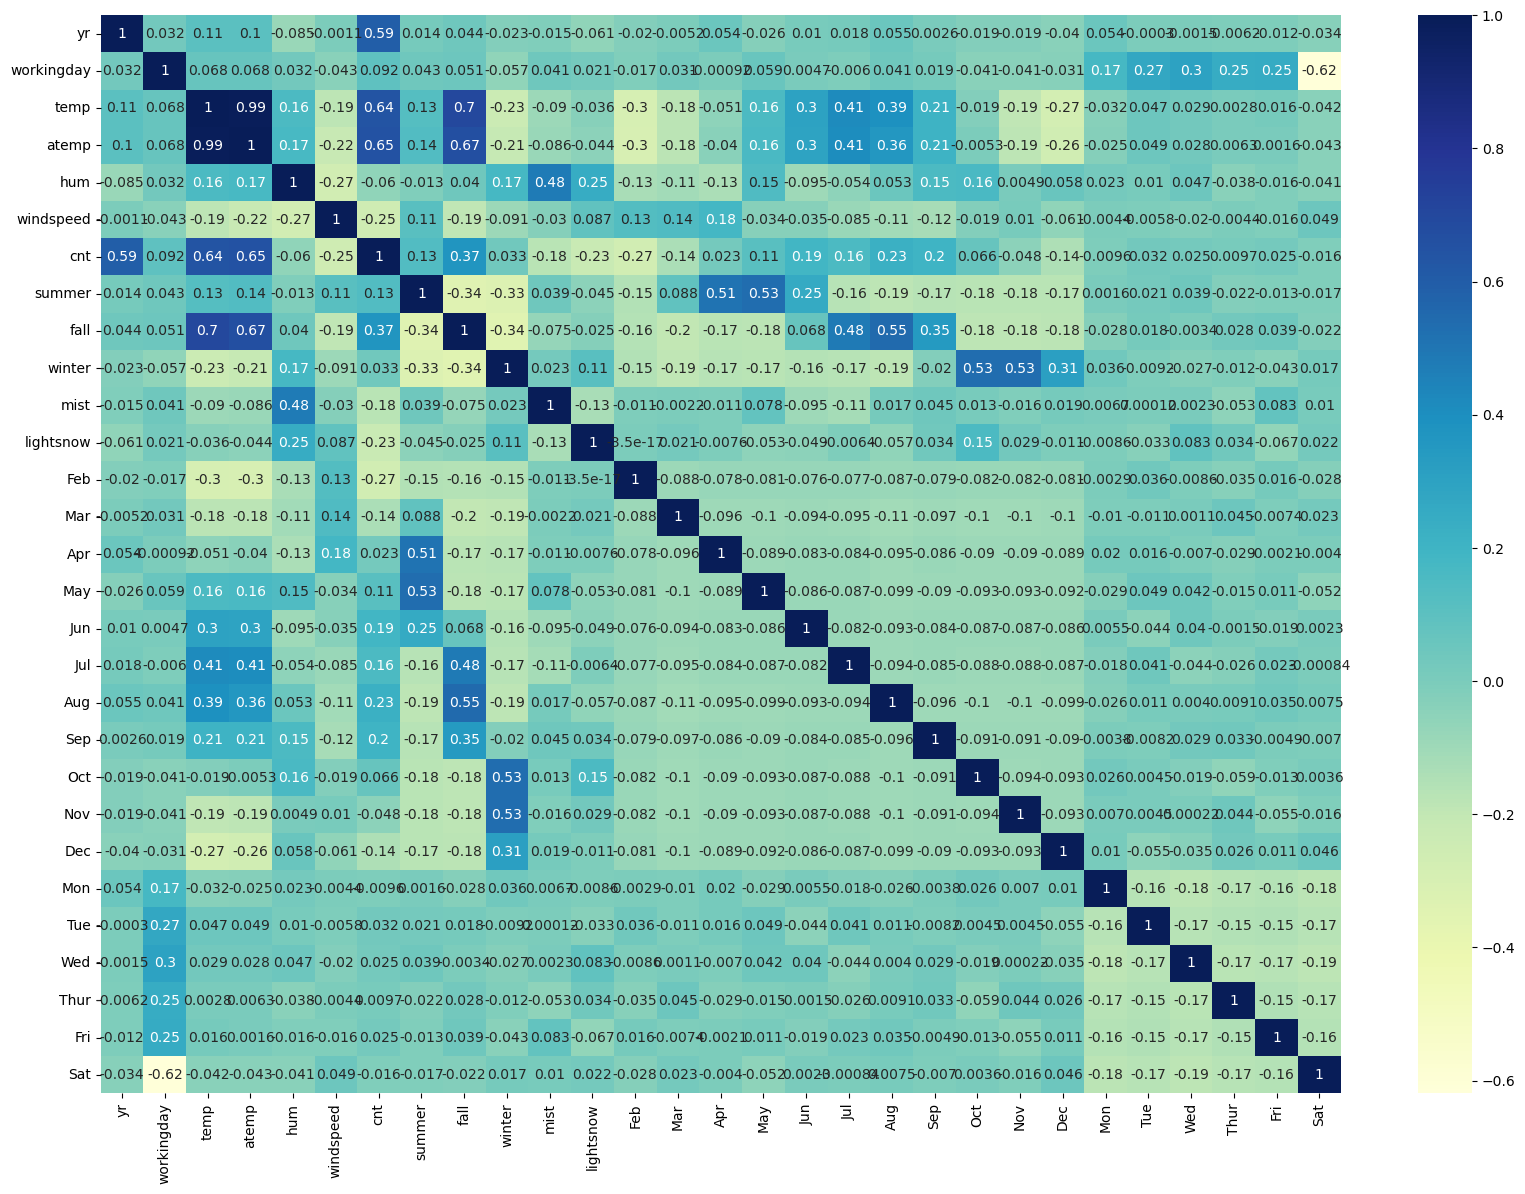

In [64]:
# Let's check the correlation coefficients to see which variables are highly correlated
plt.figure(figsize = (20, 14))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

### Step 6: Feature Selection
#### Selecting features using automated RFE as well manual

In [66]:
y_train = df_train.pop('cnt')
X_train = df_train

In [67]:
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm)
rfe = rfe.fit(X_train, y_train)

In [68]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('summer', True, 1),
 ('fall', False, 2),
 ('winter', True, 1),
 ('mist', True, 1),
 ('lightsnow', True, 1),
 ('Feb', False, 12),
 ('Mar', False, 3),
 ('Apr', False, 5),
 ('May', False, 4),
 ('Jun', False, 6),
 ('Jul', False, 13),
 ('Aug', True, 1),
 ('Sep', True, 1),
 ('Oct', True, 1),
 ('Nov', False, 14),
 ('Dec', False, 15),
 ('Mon', False, 7),
 ('Tue', False, 8),
 ('Wed', False, 10),
 ('Thur', False, 9),
 ('Fri', False, 11),
 ('Sat', True, 1)]

In [69]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'workingday', 'temp', 'atemp', 'hum', 'windspeed', 'summer',
       'winter', 'mist', 'lightsnow', 'Aug', 'Sep', 'Oct', 'Sat'],
      dtype='object')

In [70]:
X_train_rfe = X_train[col]

In [71]:
X_train_rfe = sm.add_constant(X_train_rfe)

In [72]:
lm = sm.OLS(y_train, X_train_rfe).fit()

In [73]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     195.5
Date:                Wed, 29 Jan 2025   Prob (F-statistic):          2.71e-191
Time:                        02:38:58   Log-Likelihood:                 516.96
No. Observations:                 510   AIC:                            -1004.
Df Residuals:                     495   BIC:                            -940.4
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1845      0.029      6.474      0.0

### Step 7: Model Building
#### Selecting features using manual way

In [75]:
#Model building using manual way
# Add a constant
X_train_lm = sm.add_constant(X_train[['temp']])

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

In [76]:
lr.params

const    0.169798
temp     0.639952
dtype: float64

In [77]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.414
Model:                            OLS   Adj. R-squared:                  0.413
Method:                 Least Squares   F-statistic:                     359.1
Date:                Wed, 29 Jan 2025   Prob (F-statistic):           5.80e-61
Time:                        02:38:58   Log-Likelihood:                 174.84
No. Observations:                 510   AIC:                            -345.7
Df Residuals:                     508   BIC:                            -337.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1698      0.020      8.628      0.0

In [78]:
X_train_lm = X_train[['temp', 'hum']]

In [79]:
# Build a linear model
X_train_lm = sm.add_constant(X_train_lm)
lr_1 = sm.OLS(y_train, X_train_lm).fit()
lr_1.params

const    0.320358
temp     0.665293
hum     -0.252434
dtype: float64

In [80]:
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.440
Model:                            OLS   Adj. R-squared:                  0.438
Method:                 Least Squares   F-statistic:                     199.5
Date:                Wed, 29 Jan 2025   Prob (F-statistic):           1.25e-64
Time:                        02:38:58   Log-Likelihood:                 186.52
No. Observations:                 510   AIC:                            -367.0
Df Residuals:                     507   BIC:                            -354.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3204      0.036      8.803      0.0

In [81]:
X_train_lm = X_train[['temp', 'hum','windspeed']]

In [82]:
# Build a linear model
X_train_lm = sm.add_constant(X_train_lm)
lr_2 = sm.OLS(y_train, X_train_lm).fit()
lr_2.params

const        0.462395
temp         0.637062
hum         -0.323652
windspeed   -0.251122
dtype: float64

In [83]:
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.473
Model:                            OLS   Adj. R-squared:                  0.470
Method:                 Least Squares   F-statistic:                     151.4
Date:                Wed, 29 Jan 2025   Prob (F-statistic):           5.04e-70
Time:                        02:38:58   Log-Likelihood:                 201.87
No. Observations:                 510   AIC:                            -395.7
Df Residuals:                     506   BIC:                            -378.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4624      0.043     10.630      0.0

In [84]:
X_train_lm = X_train[['temp', 'hum','windspeed','summer']]

In [85]:
# Build a linear model
X_train_lm = sm.add_constant(X_train_lm)
lr_3 = sm.OLS(y_train, X_train_lm).fit()
lr_3.params

const        0.463297
temp         0.625826
hum         -0.323676
windspeed   -0.264787
summer       0.038898
dtype: float64

In [86]:
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.478
Model:                            OLS   Adj. R-squared:                  0.474
Method:                 Least Squares   F-statistic:                     115.8
Date:                Wed, 29 Jan 2025   Prob (F-statistic):           5.14e-70
Time:                        02:38:58   Log-Likelihood:                 204.48
No. Observations:                 510   AIC:                            -399.0
Df Residuals:                     505   BIC:                            -377.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4633      0.043     10.694      0.0

In [87]:
X_train_lm = X_train[['temp', 'hum','windspeed','summer','winter','mist','lightsnow']]
X_train_lm = sm.add_constant(X_train_lm)
lr_4 = sm.OLS(y_train, X_train_lm).fit()
lr_4.params

const        0.352976
temp         0.671363
hum         -0.265000
windspeed   -0.199693
summer       0.078072
winter       0.144098
mist        -0.033811
lightsnow   -0.240300
dtype: float64

In [88]:
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.566
Model:                            OLS   Adj. R-squared:                  0.560
Method:                 Least Squares   F-statistic:                     93.46
Date:                Wed, 29 Jan 2025   Prob (F-statistic):           8.44e-87
Time:                        02:38:58   Log-Likelihood:                 251.25
No. Observations:                 510   AIC:                            -486.5
Df Residuals:                     502   BIC:                            -452.6
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3530      0.043      8.146      0.0

In [89]:
X_train_lm = X_train[['temp', 'hum','windspeed','summer','winter','mist','lightsnow','yr']]
X_train_lm = sm.add_constant(X_train_lm)
lr_5 = sm.OLS(y_train, X_train_lm).fit()
lr_5.params

const        0.209982
temp         0.600122
hum         -0.155740
windspeed   -0.195814
summer       0.077171
winter       0.134774
mist        -0.048475
lightsnow   -0.228584
yr           0.228801
dtype: float64

In [90]:
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     283.2
Date:                Wed, 29 Jan 2025   Prob (F-statistic):          1.91e-180
Time:                        02:38:58   Log-Likelihood:                 474.23
No. Observations:                 510   AIC:                            -930.5
Df Residuals:                     501   BIC:                            -892.3
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2100      0.029      7.360      0.0

In [91]:
X_train_lm = X_train[['temp', 'hum','windspeed','summer','winter','mist','lightsnow','yr','Aug','Sep','Oct','Nov','Dec','Feb','Mar','Apr','May','Jun','Jul']]
X_train_lm = sm.add_constant(X_train_lm)
lr_6 = sm.OLS(y_train, X_train_lm).fit()
lr_6.params

const        0.221018
temp         0.459076
hum         -0.169692
windspeed   -0.191883
summer       0.067072
winter       0.138165
mist        -0.054375
lightsnow   -0.240537
yr           0.231201
Aug          0.127227
Sep          0.182870
Oct          0.081770
Nov          0.029551
Dec          0.030279
Feb          0.025774
Mar          0.074813
Apr          0.080626
May          0.107284
Jun          0.089457
Jul          0.067672
dtype: float64

In [92]:
print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     138.2
Date:                Wed, 29 Jan 2025   Prob (F-statistic):          7.06e-183
Time:                        02:38:58   Log-Likelihood:                 510.21
No. Observations:                 510   AIC:                            -980.4
Df Residuals:                     490   BIC:                            -895.7
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2210      0.029      7.618      0.0

In [93]:
X_train_lm = X_train[['temp', 'hum','windspeed','summer','winter','mist','lightsnow','yr','Aug','Sep','Oct','Nov','Dec','Feb','Mar','Apr','May','Jun','Jul','Mon','Tue','Wed','Thur','Fri','Sat']]
X_train_lm = sm.add_constant(X_train_lm)
lr_7 = sm.OLS(y_train, X_train_lm).fit()
lr_7.params

const        0.175265
temp         0.449547
hum         -0.151896
windspeed   -0.190235
summer       0.065915
winter       0.139000
mist        -0.059360
lightsnow   -0.251674
yr           0.232754
Aug          0.129103
Sep          0.184046
Oct          0.086899
Nov          0.031803
Dec          0.029450
Feb          0.029195
Mar          0.075274
Apr          0.085949
May          0.111184
Jun          0.095296
Jul          0.074610
Mon          0.023467
Tue          0.036515
Wed          0.049408
Thur         0.044294
Fri          0.053721
Sat          0.053762
dtype: float64

In [94]:
print(lr_7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     109.0
Date:                Wed, 29 Jan 2025   Prob (F-statistic):          5.95e-181
Time:                        02:38:59   Log-Likelihood:                 520.90
No. Observations:                 510   AIC:                            -989.8
Df Residuals:                     484   BIC:                            -879.7
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1753      0.031      5.706      0.0

In [95]:
X_train_lm = X_train[['temp', 'hum','windspeed','summer','winter','mist','lightsnow','yr','Aug','Sep','Oct','Nov','Dec','Feb','Mar','Apr','May','Jun','Jul','Mon','Tue','Wed','Thur','Fri','Sat','fall','workingday']]
X_train_lm = sm.add_constant(X_train_lm)
lr_8 = sm.OLS(y_train, X_train_lm).fit()
lr_8.params

const         0.176002
temp          0.450562
hum          -0.151340
windspeed    -0.186453
summer        0.086884
winter        0.154006
mist         -0.061066
lightsnow    -0.257443
yr            0.232116
Aug           0.077181
Sep           0.143836
Oct           0.070310
Nov           0.020925
Dec           0.017191
Feb           0.030495
Mar           0.063822
Apr           0.062777
May           0.086717
Jun           0.059804
Jul           0.022427
Mon          -0.052801
Tue          -0.050784
Wed          -0.037282
Thur         -0.041131
Fri          -0.031894
Sat           0.054536
fall          0.048159
workingday    0.086925
dtype: float64

In [96]:
print(lr_8.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     103.8
Date:                Wed, 29 Jan 2025   Prob (F-statistic):          8.74e-182
Time:                        02:38:59   Log-Likelihood:                 527.95
No. Observations:                 510   AIC:                            -999.9
Df Residuals:                     482   BIC:                            -881.3
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1760      0.030      5.798      0.0

In [97]:
X_train_lm = X_train[['temp', 'hum','windspeed','summer','winter','mist','lightsnow','yr','Aug','Sep','Oct','Nov','Dec','Feb','Mar','Apr','May','Jun','Jul','Mon','Tue','Wed','Thur','Fri','Sat','fall','workingday','atemp']]
X_train_lm = sm.add_constant(X_train_lm)
lr_9 = sm.OLS(y_train, X_train_lm).fit()
lr_9.params

const         0.175618
temp          0.401322
hum          -0.151812
windspeed    -0.184388
summer        0.086796
winter        0.153968
mist         -0.061030
lightsnow    -0.256697
yr            0.232208
Aug           0.078641
Sep           0.144371
Oct           0.070260
Nov           0.020783
Dec           0.016994
Feb           0.030389
Mar           0.063853
Apr           0.062565
May           0.087257
Jun           0.060862
Jul           0.023289
Mon          -0.052340
Tue          -0.050146
Wed          -0.036571
Thur         -0.040588
Fri          -0.030838
Sat           0.054533
fall          0.048580
workingday    0.086273
atemp         0.050628
dtype: float64

In [98]:
print(lr_9.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     99.96
Date:                Wed, 29 Jan 2025   Prob (F-statistic):          8.42e-181
Time:                        02:38:59   Log-Likelihood:                 528.03
No. Observations:                 510   AIC:                            -998.1
Df Residuals:                     481   BIC:                            -875.3
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1756      0.030      5.777      0.0

In [99]:
X_train.drop(['atemp'], axis = 1, inplace = True)
X_train_lm = sm.add_constant(X_train)
lr_10 = sm.OLS(y_train, X_train_lm).fit()
print(lr_10.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     103.8
Date:                Wed, 29 Jan 2025   Prob (F-statistic):          8.74e-182
Time:                        02:38:59   Log-Likelihood:                 527.95
No. Observations:                 510   AIC:                            -999.9
Df Residuals:                     482   BIC:                            -881.3
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1760      0.030      5.798      0.0

In [100]:
X_train.drop(['Nov'], axis = 1, inplace = True)
X_train_lm = sm.add_constant(X_train)
lr_11 = sm.OLS(y_train, X_train_lm).fit()
print(lr_11.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     108.0
Date:                Wed, 29 Jan 2025   Prob (F-statistic):          1.02e-182
Time:                        02:38:59   Log-Likelihood:                 527.74
No. Observations:                 510   AIC:                            -1001.
Df Residuals:                     483   BIC:                            -887.1
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1782      0.030      5.910      0.0

In [101]:
X_train.drop(['Jul'], axis = 1, inplace = True)
X_train_lm = sm.add_constant(X_train)
lr_12 = sm.OLS(y_train, X_train_lm).fit()
print(lr_12.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     112.5
Date:                Wed, 29 Jan 2025   Prob (F-statistic):          9.72e-184
Time:                        02:38:59   Log-Likelihood:                 527.71
No. Observations:                 510   AIC:                            -1003.
Df Residuals:                     484   BIC:                            -893.3
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1782      0.030      5.917      0.0

In [102]:
X_train.drop(['Dec'], axis = 1, inplace = True)
X_train_lm = sm.add_constant(X_train)
lr_13 = sm.OLS(y_train, X_train_lm).fit()
print(lr_13.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     117.4
Date:                Wed, 29 Jan 2025   Prob (F-statistic):          9.08e-185
Time:                        02:38:59   Log-Likelihood:                 527.69
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     485   BIC:                            -899.5
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1788      0.030      5.963      0.0

In [103]:
X_train.drop(['Fri'], axis = 1, inplace = True)
X_train_lm = sm.add_constant(X_train)
lr_14 = sm.OLS(y_train, X_train_lm).fit()
print(lr_14.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     122.4
Date:                Wed, 29 Jan 2025   Prob (F-statistic):          1.41e-185
Time:                        02:38:59   Log-Likelihood:                 527.10
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     486   BIC:                            -904.6
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1737      0.030      5.869      0.0

In [104]:
X_train.drop(['Wed'], axis = 1, inplace = True)
X_train_lm = sm.add_constant(X_train)
lr_15 = sm.OLS(y_train, X_train_lm).fit()
print(lr_15.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     128.1
Date:                Wed, 29 Jan 2025   Prob (F-statistic):          1.53e-186
Time:                        02:38:59   Log-Likelihood:                 526.87
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     487   BIC:                            -910.4
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1735      0.030      5.867      0.0

In [105]:
X_train.drop(['Thur'], axis = 1, inplace = True)
X_train_lm = sm.add_constant(X_train)
lr_16 = sm.OLS(y_train, X_train_lm).fit()
print(lr_16.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     134.3
Date:                Wed, 29 Jan 2025   Prob (F-statistic):          1.66e-187
Time:                        02:38:59   Log-Likelihood:                 526.62
No. Observations:                 510   AIC:                            -1009.
Df Residuals:                     488   BIC:                            -916.1
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1726      0.030      5.844      0.0

In [106]:
X_train.drop(['Tue'], axis = 1, inplace = True)
X_train_lm = sm.add_constant(X_train)
lr_17 = sm.OLS(y_train, X_train_lm).fit()
print(lr_17.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     140.8
Date:                Wed, 29 Jan 2025   Prob (F-statistic):          2.96e-188
Time:                        02:38:59   Log-Likelihood:                 525.82
No. Observations:                 510   AIC:                            -1010.
Df Residuals:                     489   BIC:                            -920.7
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1739      0.030      5.889      0.0

In [107]:
X_train.drop(['Feb'], axis = 1, inplace = True)
X_train_lm = sm.add_constant(X_train)
lr_18 = sm.OLS(y_train, X_train_lm).fit()
print(lr_18.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     148.0
Date:                Wed, 29 Jan 2025   Prob (F-statistic):          5.33e-189
Time:                        02:38:59   Log-Likelihood:                 524.98
No. Observations:                 510   AIC:                            -1010.
Df Residuals:                     490   BIC:                            -925.3
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1830      0.029      6.389      0.0

In [108]:
X_train.drop(['Mon'], axis = 1, inplace = True)
X_train_lm = sm.add_constant(X_train)
lr_19 = sm.OLS(y_train, X_train_lm).fit()
print(lr_19.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     155.5
Date:                Wed, 29 Jan 2025   Prob (F-statistic):          1.59e-189
Time:                        02:38:59   Log-Likelihood:                 523.58
No. Observations:                 510   AIC:                            -1009.
Df Residuals:                     491   BIC:                            -928.7
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1820      0.029      6.345      0.0

In [109]:
X_train.drop(['Apr'], axis = 1, inplace = True)
X_train_lm = sm.add_constant(X_train)
lr_20 = sm.OLS(y_train, X_train_lm).fit()
print(lr_20.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     163.8
Date:                Wed, 29 Jan 2025   Prob (F-statistic):          5.78e-190
Time:                        02:38:59   Log-Likelihood:                 521.96
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     492   BIC:                            -931.7
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1860      0.029      6.487      0.0

In [110]:
X_train.drop(['Jun'], axis = 1, inplace = True)
X_train_lm = sm.add_constant(X_train)
lr_21 = sm.OLS(y_train, X_train_lm).fit()
print(lr_21.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     174.0
Date:                Wed, 29 Jan 2025   Prob (F-statistic):          6.94e-191
Time:                        02:38:59   Log-Likelihood:                 521.47
No. Observations:                 510   AIC:                            -1009.
Df Residuals:                     493   BIC:                            -936.9
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1854      0.029      6.468      0.0

In [111]:
X_train.drop(['May'], axis = 1, inplace = True)
X_train_lm = sm.add_constant(X_train)
lr_22 = sm.OLS(y_train, X_train_lm).fit()
print(lr_22.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.6
Date:                Wed, 29 Jan 2025   Prob (F-statistic):          2.36e-191
Time:                        02:38:59   Log-Likelihood:                 519.86
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     494   BIC:                            -940.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1794      0.029      6.290      0.0

In [112]:
X_train.drop(['fall'], axis = 1, inplace = True)
X_train_lm = sm.add_constant(X_train)
lr_23 = sm.OLS(y_train, X_train_lm).fit()
print(lr_23.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.7
Date:                Wed, 29 Jan 2025   Prob (F-statistic):          7.80e-192
Time:                        02:38:59   Log-Likelihood:                 518.25
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     495   BIC:                            -943.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1797      0.029      6.285      0.0

In [113]:
X_train.drop(['Mar'], axis = 1, inplace = True)
X_train_lm = sm.add_constant(X_train)
lr_24 = sm.OLS(y_train, X_train_lm).fit()
print(lr_24.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     210.9
Date:                Wed, 29 Jan 2025   Prob (F-statistic):          1.86e-192
Time:                        02:38:59   Log-Likelihood:                 516.94
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     496   BIC:                            -946.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1848      0.028      6.496      0.0

In [114]:
# Check for the VIF values of the feature variables
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,16.09
2,temp,10.01
1,workingday,4.55
4,windspeed,3.76
6,winter,2.27
7,mist,2.13
0,yr,2.03
5,summer,1.82
12,Sat,1.79
11,Oct,1.61


In [115]:
X_train.drop(['hum'], axis = 1, inplace = True)
X_train_lm = sm.add_constant(X_train)
lr_25 = sm.OLS(y_train, X_train_lm).fit()
print(lr_25.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     218.2
Date:                Wed, 29 Jan 2025   Prob (F-statistic):          2.86e-189
Time:                        02:38:59   Log-Likelihood:                 506.56
No. Observations:                 510   AIC:                            -987.1
Df Residuals:                     497   BIC:                            -932.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0856      0.019      4.610      0.0

In [116]:
# Check for the VIF values of the feature variables
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,6.26
1,workingday,4.07
3,windspeed,3.49
0,yr,2.02
5,winter,1.99
4,summer,1.82
11,Sat,1.70
10,Oct,1.61
8,Aug,1.59
6,mist,1.54


In [117]:
X_train.drop(['Oct'], axis = 1, inplace = True)
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,6.10
1,workingday,4.04
3,windspeed,3.49
0,yr,2.02
4,summer,1.81
10,Sat,1.69
8,Aug,1.58
6,mist,1.54
5,winter,1.51
9,Sep,1.30


In [118]:
X_train.drop(['windspeed'], axis = 1, inplace = True)
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.68
1,workingday,3.64
0,yr,1.98
3,summer,1.79
7,Aug,1.56
9,Sat,1.55
5,mist,1.52
4,winter,1.51
8,Sep,1.29
6,lightsnow,1.07


In [119]:
X_train.drop(['Aug'], axis = 1, inplace = True)
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.50
1,workingday,3.63
0,yr,1.98
8,Sat,1.55
3,summer,1.53
5,mist,1.51
4,winter,1.38
7,Sep,1.19
6,lightsnow,1.07


In [120]:
# Build a final fitted model
X_train_lm = sm.add_constant(X_train)
lr_final = sm.OLS(y_train, X_train_lm).fit()
print(lr_final.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     258.5
Date:                Wed, 29 Jan 2025   Prob (F-statistic):          9.24e-182
Time:                        02:38:59   Log-Likelihood:                 480.24
No. Observations:                 510   AIC:                            -940.5
Df Residuals:                     500   BIC:                            -898.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0111      0.016      0.692      0.4

In [121]:
y_train_cnt = lr_final.predict(X_train_lm)

Text(0.5, 0, 'Errors')

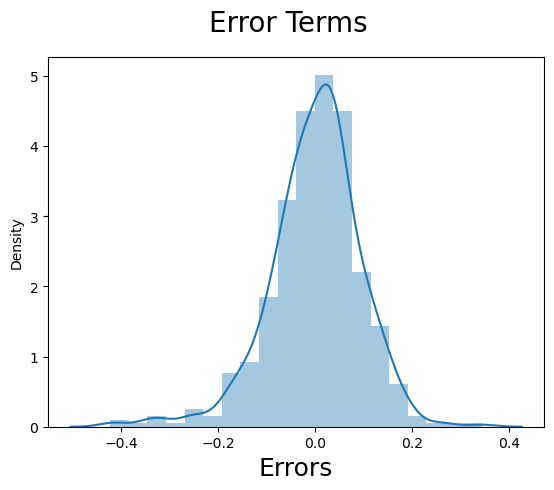

In [122]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                
plt.xlabel('Errors', fontsize = 18)  

### Step 8: Model Evaluation using test data
#### Using Test Data

In [124]:
num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']
df_test.head()
df_test.shape
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.describe()

,yr,workingday,temp,atemp,hum,windspeed,cnt,summer,fall,winter,...,Sep,Oct,Nov,Dec,Mon,Tue,Wed,Thur,Fri,Sat
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.698630,0.558941,0.532991,0.638508,0.313350,0.520592,0.264840,0.246575,0.232877,...,0.086758,0.082192,0.073059,0.086758,0.127854,0.164384,0.100457,0.164384,0.178082,0.118721
std,0.500722,0.459904,0.233698,0.217888,0.148974,0.159947,0.218435,0.442259,0.432005,0.423633,...,0.282125,0.275286,0.260830,0.282125,0.334692,0.371472,0.301297,0.371472,0.383458,0.324202
min,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.354650,0.344751,0.527265,0.198517,0.377531,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.558691,0.549198,0.627737,0.299459,0.524275,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.759096,0.714132,0.743928,0.403048,0.672745,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [125]:
y_test = df_test.pop('cnt')
X_test = df_test

In [126]:
# Creating X_test_1 dataframe by selecting variables from X_test
X_test1 = X_test[['yr', 'workingday', 'temp', 'summer', 'winter', 'mist', 'lightsnow', 'Sep','Sat']]

In [127]:
#Adding constant variable to test dataframe
X_test1 = sm.add_constant(X_test1)

In [128]:
#Making Predictions using the final train model
y_pred1 = lr_final.predict(X_test1)

In [129]:
r2_score(y_true=y_test, y_pred=y_pred1)

0.8000754489099358

In [130]:
#Test Evaluation matches 80% roughly and so the model evaluation is meeting the criteria of 80-85%

In [ ]:
#Let's now plot the graph for actual versus predicted values.

Text(0, 0.5, 'y_pred')

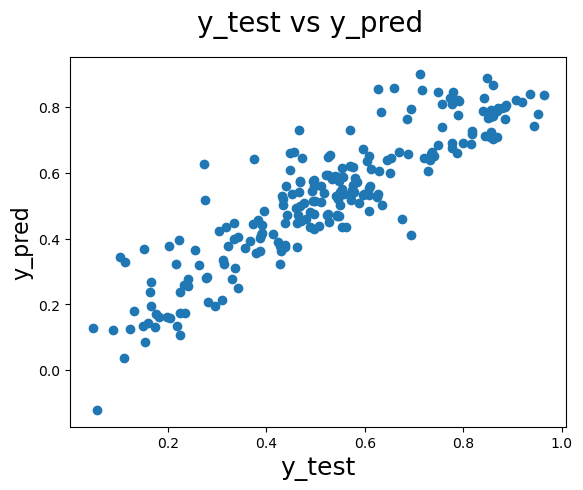

In [252]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred1)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      

#### We can see that the equation of our best fitted line is:
$ cnt = 0.232 \times yr + 0.058 \times workingday + 0.575 \times temp + 0.082 \times summer + 0.139 \times winter + 0.079 \times mist + 0.303 \times lightsnow + 0.103 \times Sep + 0.065 \times Sat + 0.011 $